In [1]:
!pip install tensorflow --user

In [2]:
# Imports
from network import Network
from tensorflow.keras.datasets import fashion_mnist  # noqa
import numpy as np

In [3]:
# Parameters
labels = ["t-shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "boot"]
network_seed = 12
hidden_layer_shape = [18]
train_val_split = 0.2
alpha = 0.001

# Load and shape data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

# Shuffle the training data
np.random.seed(network_seed)
perm = np.random.permutation(len(X_train))
X_train = X_train[perm]
Y_train = Y_train[perm]

# Validation Split
split_index = int(len(X_train) * 0.2)
X_train = X_train[split_index:]
Y_train = Y_train[split_index:]
X_val = X_train[:split_index]
Y_val = Y_train[:split_index]

In [4]:
print("Train Data:", X_train.shape, Y_train.shape)
print("Validation Data:", X_val.shape, Y_val.shape)
print("Test Data:", X_test.shape, Y_test.shape)

Train Data: (48000, 784) (48000,)
Validation Data: (12000, 784) (12000,)
Test Data: (10000, 784) (10000,)


100%|██████████| 2/2 [elapsed: 00:00 remaining: 00:00] , Alpha: 0.0005, Validation Acc: 0.04308333


Final Training Accuracy: 4.2%
Final Validation Accuracy: 4.31%
Final Recall Per-Class: 6.75%
Final Precision Per-Class: 7.82%
Final F1 Score Per-Class: 2.91%

=============== Highest Confusion Rate per Gesture ===============
't-shirt' mostly confused by 'sandal' in 29.15% of cases
'trouser' mostly confused by 't-shirt' in 0.82% of cases
'pullover' mostly confused by 'shirt' in 27.8% of cases
'dress' mostly confused by 't-shirt' in 2.06% of cases
'coat' mostly confused by 'shirt' in 19.93% of cases
'sandal' mostly confused by 'sandal' in 0.52% of cases
'shirt' mostly confused by 'sandal' in 26.67% of cases
'sneaker' mostly confused by 'sneaker' in 0.08% of cases
'bag' mostly confused by 'shirt' in 2.8% of cases
'boot' mostly confused by 'shirt' in 1.98% of cases



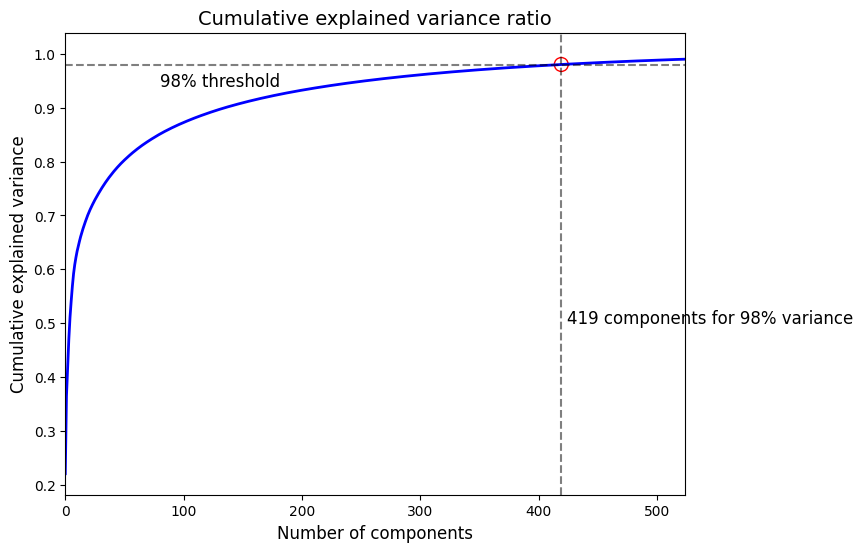

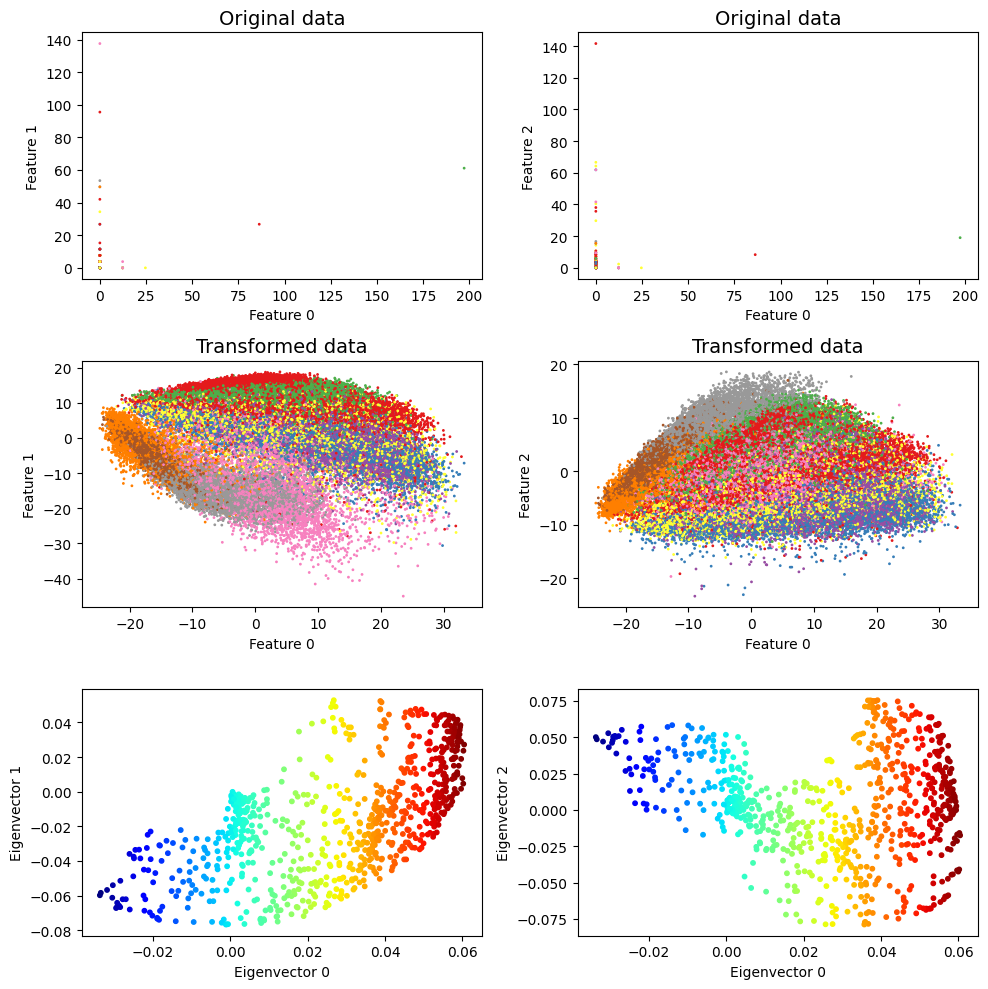

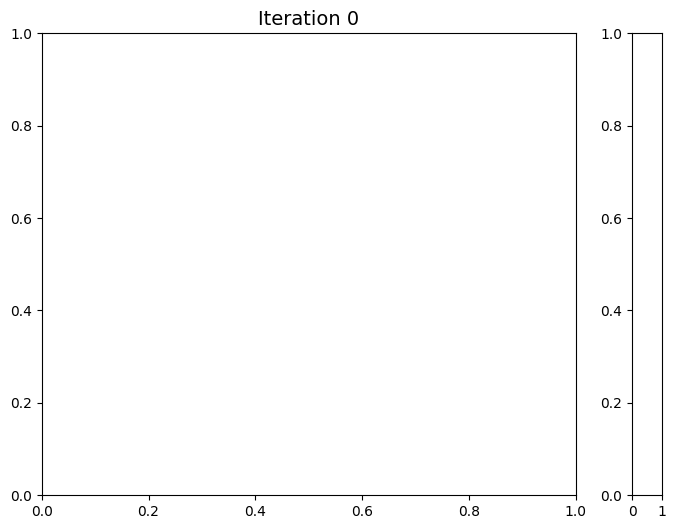

C:\Users\Marce\AppData\Roaming\Python\Python37\site-packages\matplotlib\animation.py:888: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  'Animation was deleted without rendering anything. This is '


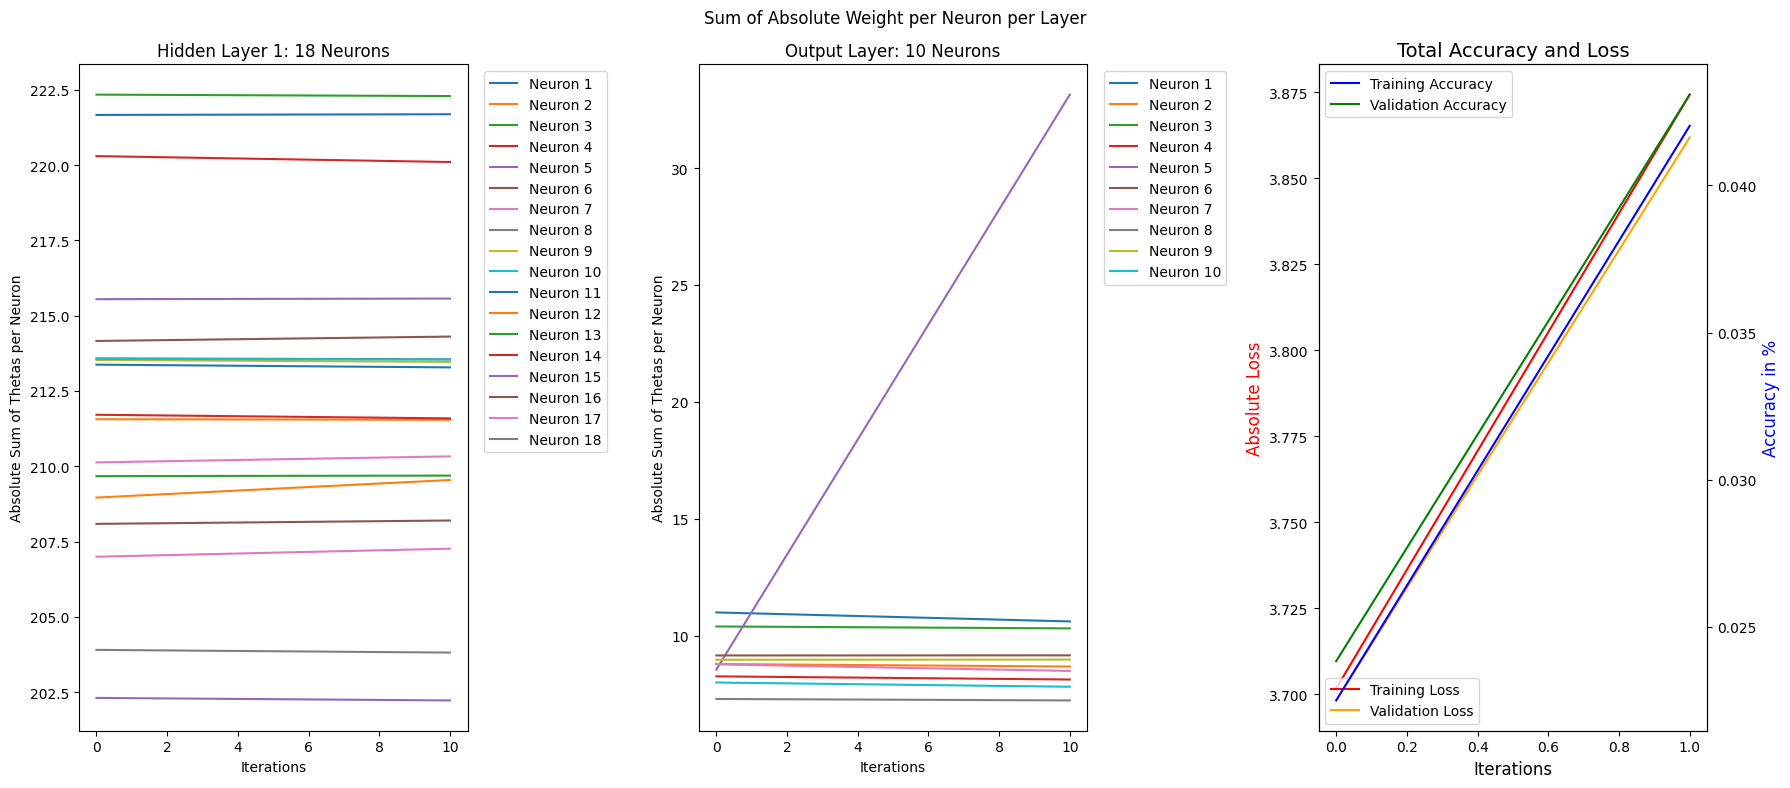

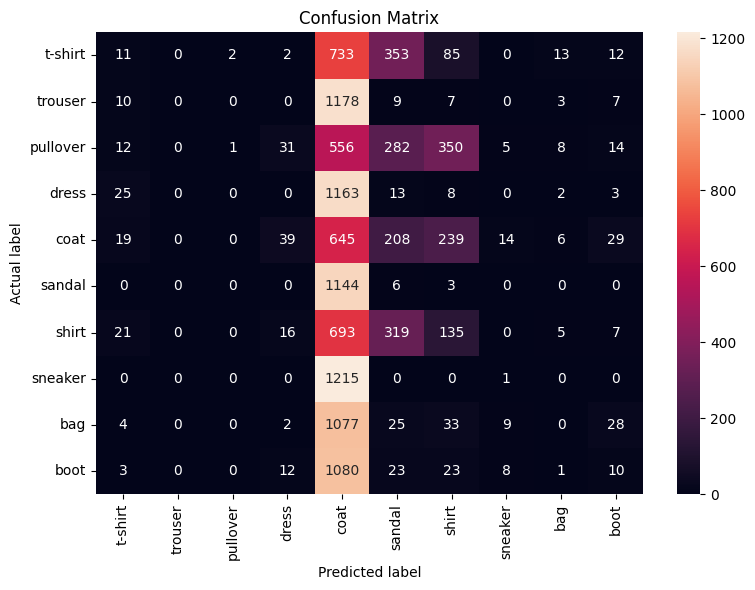

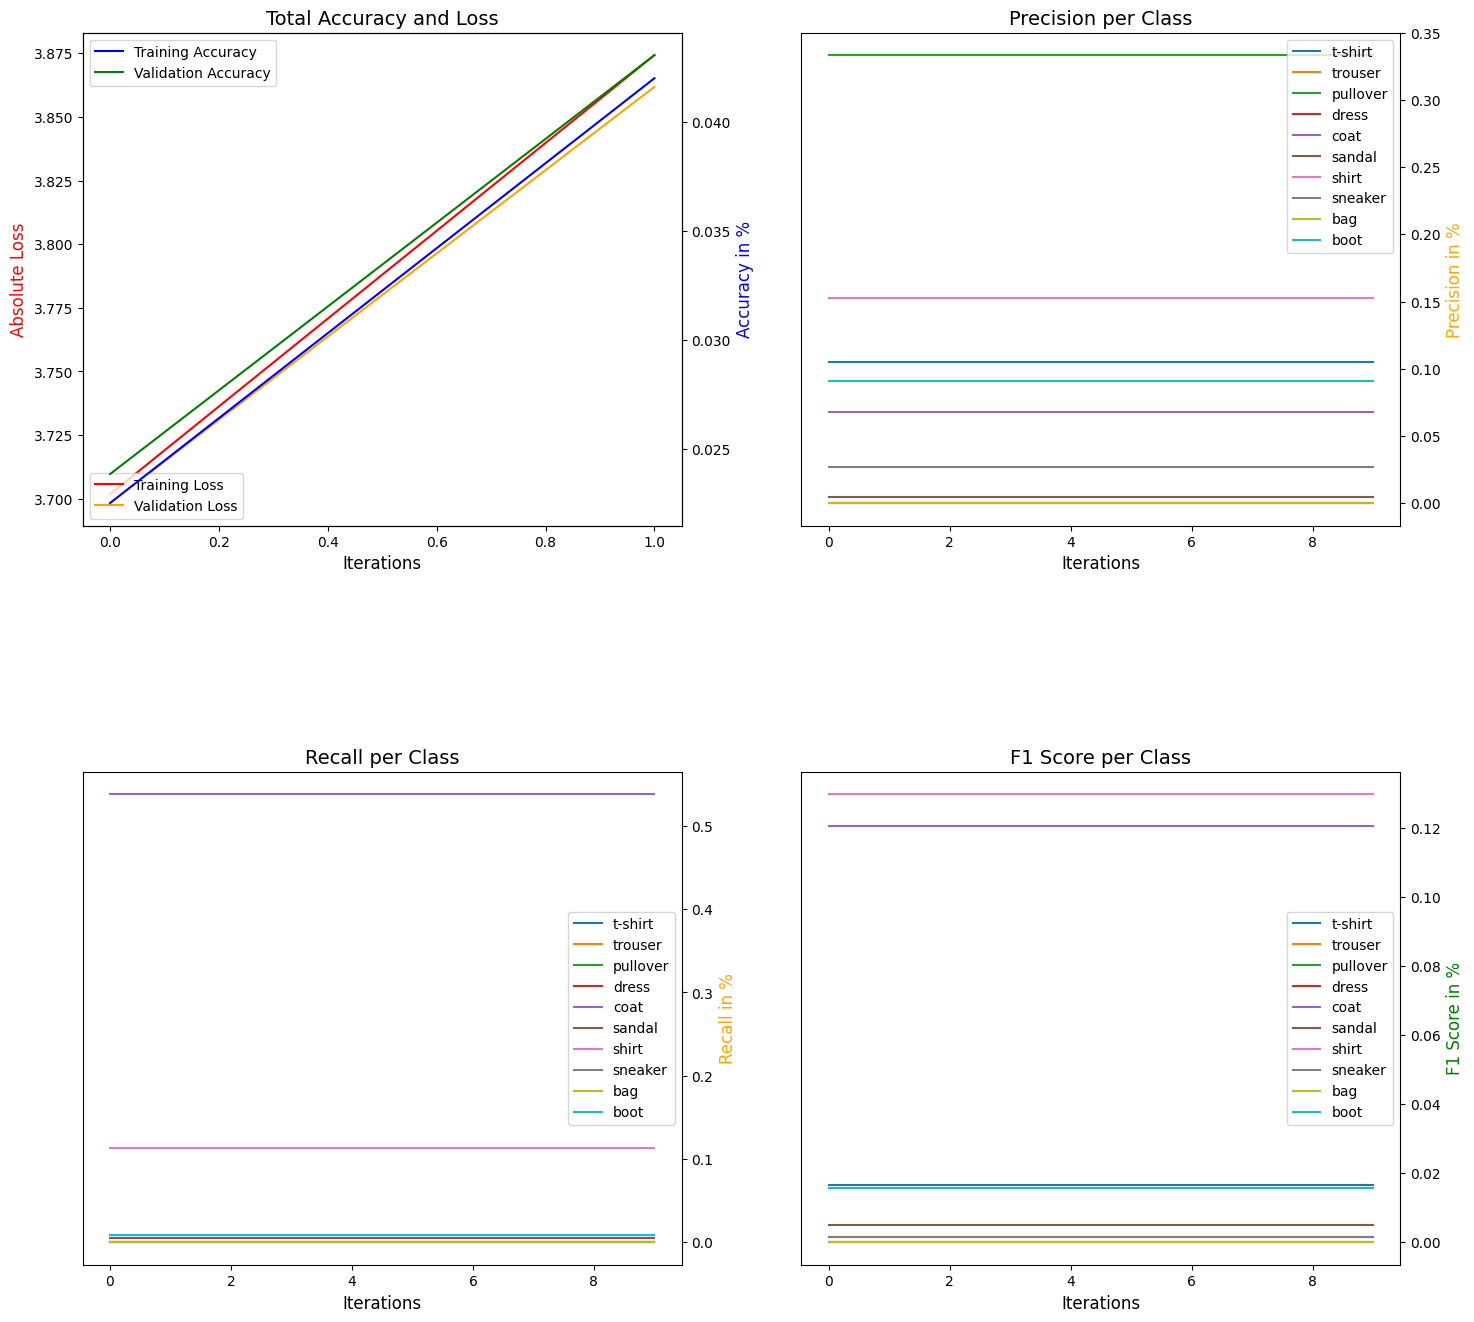

Saved to ./hyper_params_2023-04-09_21-49-06.npz


C:\Users\Marce\AppData\Roaming\Python\Python37\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [5]:
layer_shape = [X_train.shape[1]]
for layer in hidden_layer_shape:
    layer_shape.append(layer)
layer_shape.append(len(labels))

# Create
network = Network(layer_shape=layer_shape, seed=network_seed)

# Train the network with hyper parameters
network.train(hidden_layer_shape=hidden_layer_shape,
              iterations=2,
              alpha=alpha,
              X_train=X_train,
              y_train=Y_train,
              X_val=X_val,
              y_val=Y_val,
              show_plots=True,
              use_feature_scaling=True,
              adjust_alpha=True,
              class_labels=labels,
              pca_threshold=0.98)

network.save(".")

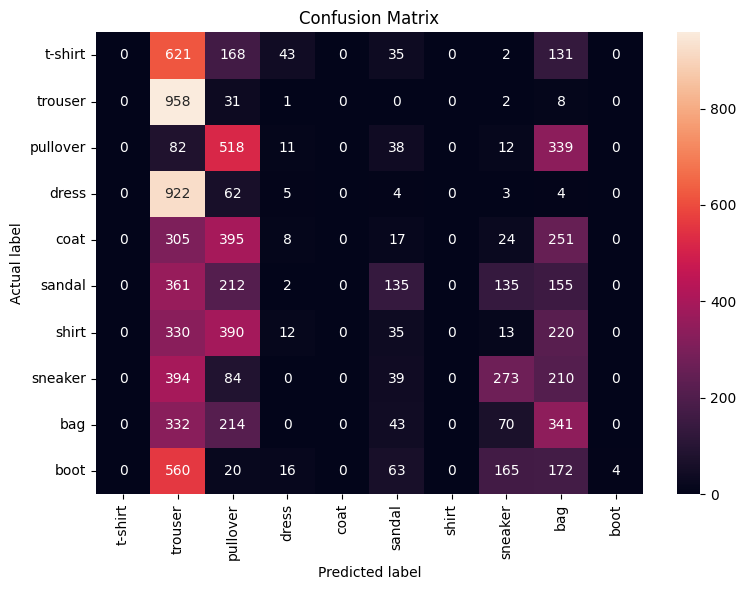

In [6]:
# ====== Evaluate the network ======
# Predict
Y_test_pred = network.predict(X=X_test, apply_feature_scaling=True)
# Evaluate
eval_data = network.evaluate(y_pred=Y_test_pred, ground_truth=Y_test)

In [7]:
# network_loaded = Network.create_with_hyper_params("file path")